In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data=pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')
data.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [ ]:
data=data.drop('Person ID',axis=1)

In [ ]:
print(f"The data set cotains{data.shape[1]} columns and rows are {data.shape[0]}")

The data set cotains12 columns and rows are 374


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   374 non-null    object 
 1   Age                      374 non-null    int64  
 2   Occupation               374 non-null    object 
 3   Sleep Duration           374 non-null    float64
 4   Quality of Sleep         374 non-null    int64  
 5   Physical Activity Level  374 non-null    int64  
 6   Stress Level             374 non-null    int64  
 7   BMI Category             374 non-null    object 
 8   Blood Pressure           374 non-null    object 
 9   Heart Rate               374 non-null    int64  
 10  Daily Steps              374 non-null    int64  
 11  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(6), object(5)
memory usage: 35.2+ KB


In [ ]:
data.isna().sum()/len(data.shape)*100

Gender                     0.0
Age                        0.0
Occupation                 0.0
Sleep Duration             0.0
Quality of Sleep           0.0
Physical Activity Level    0.0
Stress Level               0.0
BMI Category               0.0
Blood Pressure             0.0
Heart Rate                 0.0
Daily Steps                0.0
Sleep Disorder             0.0
dtype: float64

In [ ]:
data.describe().style.background_gradient(cmap='nipy_spectral')

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


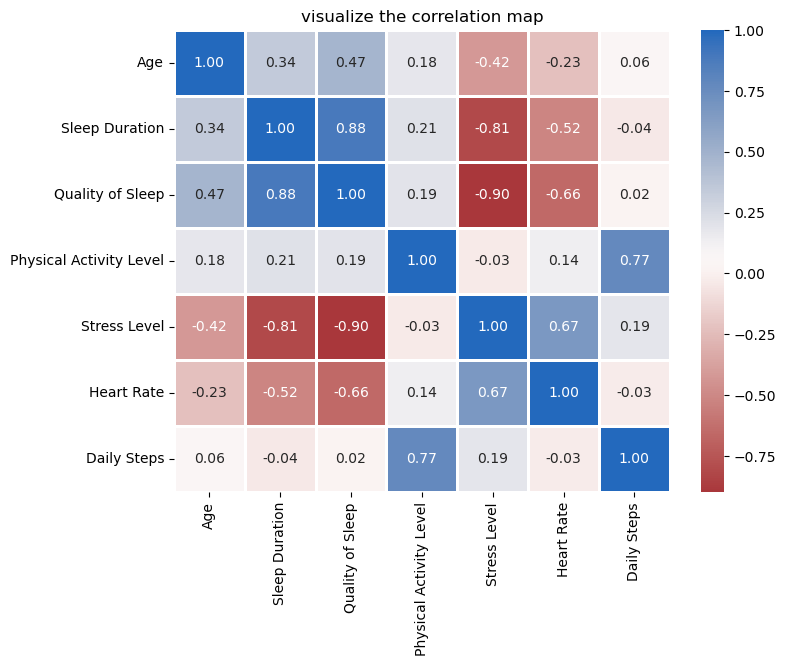

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(data.corr(),cmap='vlag_r',annot=True,fmt='.2f',linewidths=1)
plt.title("visualize the correlation map")
plt.show()

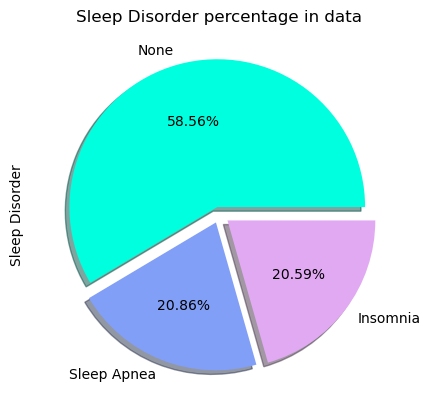

In [ ]:
data['Sleep Disorder'].value_counts(normalize=True).sort_values(ascending=False)\
.plot(kind='pie',title="Sleep Disorder percentage in data", explode=[0.05,0.06,0.07],
    labels=['None','Sleep Apnea','Insomnia'],
    colors=['#00FFDF','#819FF7','#E2A9F3'],
    autopct='%1.2f%%',
    shadow=True)
plt.show()

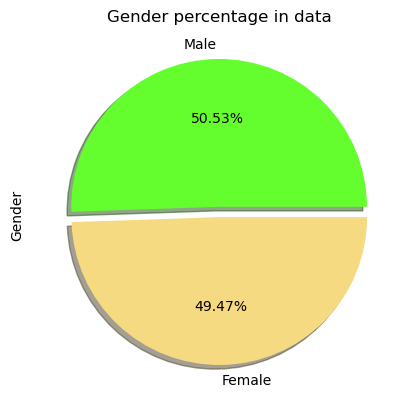

In [ ]:
data['Gender'].value_counts(normalize=True).sort_values(ascending=False)\
.plot(kind='pie',title="Gender percentage in data", explode=[0.05,0.02],
    labels=['Male','Female'],
    colors=['#64FE2E','#F5DA81'],
    autopct='%1.2f%%',
    shadow=True)
plt.show()

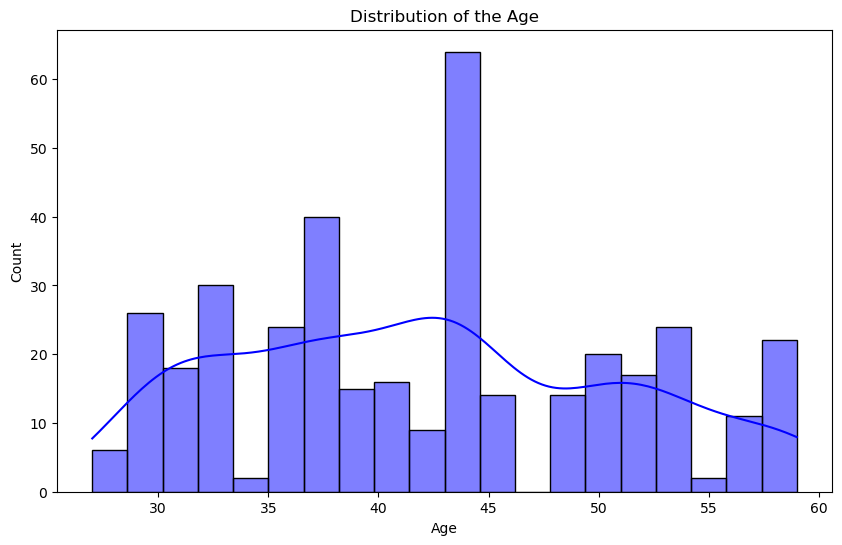

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(data=data,x='Age',stat='count',bins=20,kde=True,color='b')
plt.title("Distribution of the Age")
plt.show()

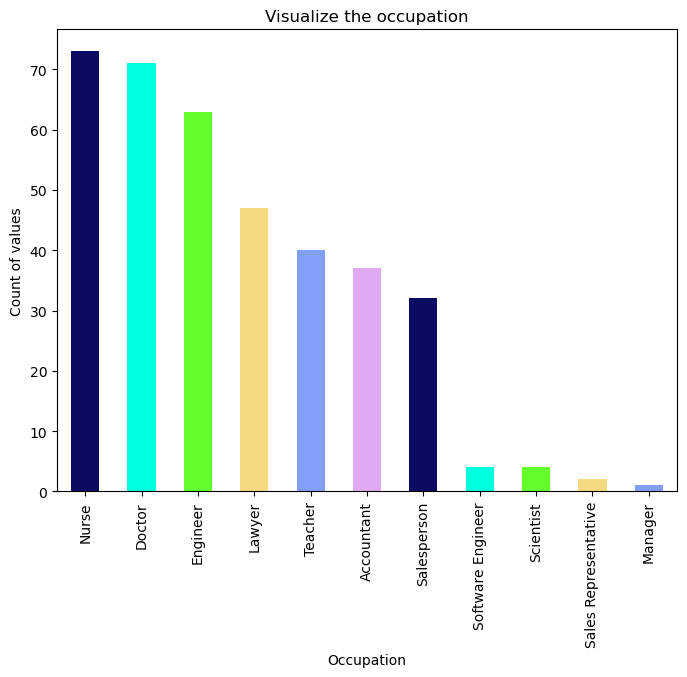

In [ ]:
data['Occupation'].value_counts().sort_values(ascending=False)\
.plot(kind='bar',title="Visualize the occupation",figsize=(8,6),color=['#0B0B61','#00FFDF','#64FE2E','#F5DA81','#819FF7','#E2A9F3'])
plt.xlabel("Occupation")
plt.ylabel("Count of values")
plt.show()

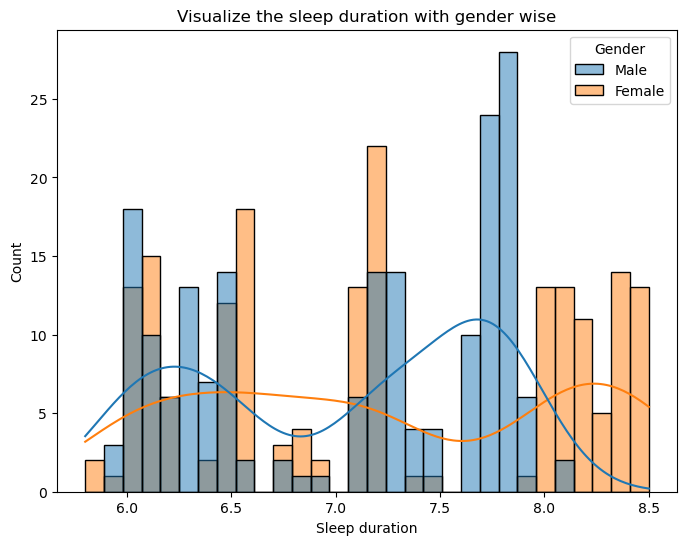

In [ ]:
plt.figure(figsize=(8,6))
sns.histplot(data=data,x='Sleep Duration',bins=30,kde=True,hue='Gender')
plt.title("Visualize the sleep duration with gender wise")
plt.xlabel("Sleep duration")
plt.ylabel("Count")
plt.show()

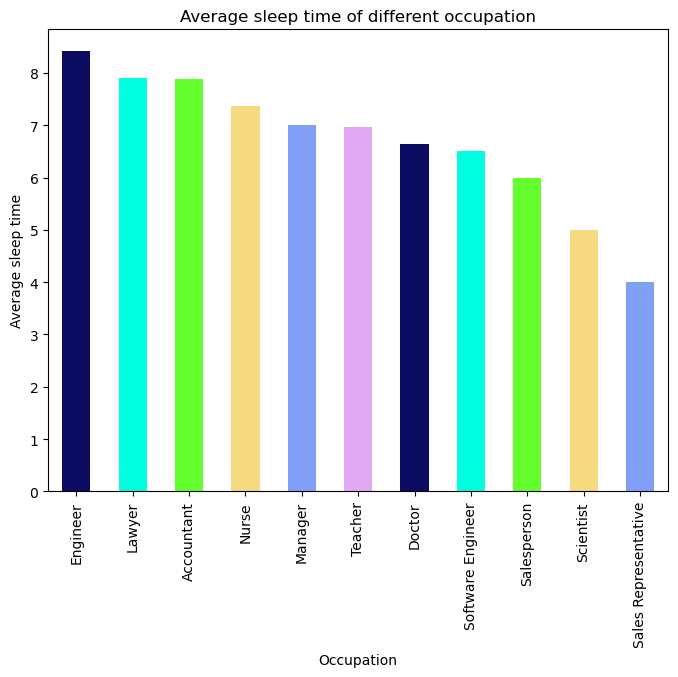

In [ ]:
data.groupby('Occupation')['Quality of Sleep'].mean().sort_values(ascending=False)\
.plot(kind='bar',title="Average sleep time of different occupation",figsize=(8,6),color=['#0B0B61','#00FFDF','#64FE2E','#F5DA81','#819FF7','#E2A9F3'])
plt.xlabel("Occupation")
plt.ylabel("Average sleep time")
plt.show()

In [ ]:
imbalanced_data=data['Gender'].value_counts()[0]/data['Gender'].value_counts()[1]
print('\nGender Imbalance',imbalanced_data)
dominate_occupation=data['Occupation'].value_counts().idxmax()
print("\nDominate_occupation",dominate_occupation)
least_demanding_job=data['Occupation'].value_counts().idxmin()
print("\nThe least demanding_job",least_demanding_job)
top_5_stress_level=data['Stress Level'].value_counts().nlargest(5)
print("\nCommon stress pattern",top_5_stress_level)
age_range=(data['Age'].min(),data['Age'].max())
print("\nAge Range",age_range)
daily_steps=(data['Daily Steps'].min(),data['Daily Steps'].max())
print("\nRange of the Daily_steps",daily_steps)
sleep_quality_skewness=data['Sleep Duration'].value_counts().skew()
print("\nSleep Quality Skewness:",sleep_quality_skewness)


Gender Imbalance 1.0216216216216216

Dominate_occupation Nurse

The least demanding_job Manager

Common stress pattern 3    71
8    70
4    70
5    67
7    50
Name: Stress Level, dtype: int64

Age Range (27, 59)

Range of the Daily_steps (3000, 10000)

Sleep Quality Skewness: 0.7855254005718885


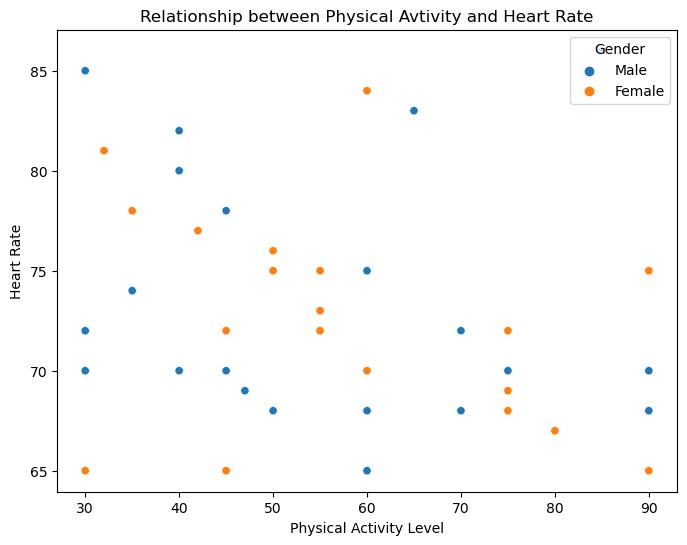

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=data,x='Physical Activity Level',y='Heart Rate',hue='Gender')
plt.title("Relationship between Physical Avtivity and Heart Rate")
plt.show()

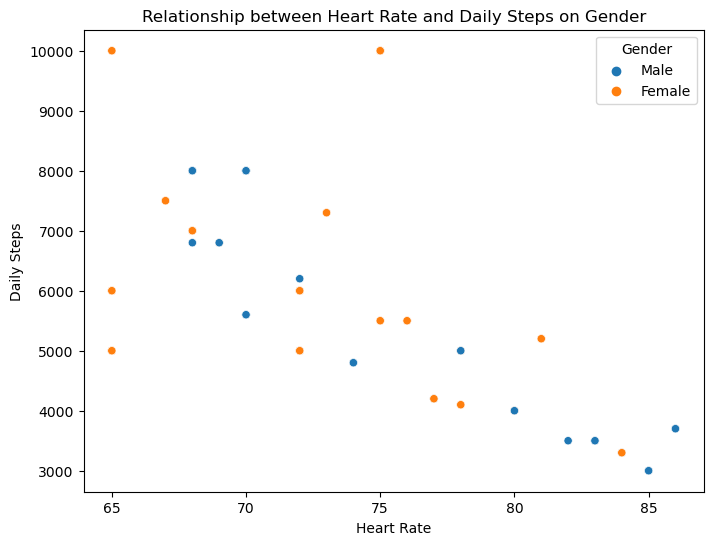

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=data,x='Heart Rate',y='Daily Steps',hue='Gender')
plt.title("Relationship between Heart Rate and Daily Steps on Gender")
plt.show()

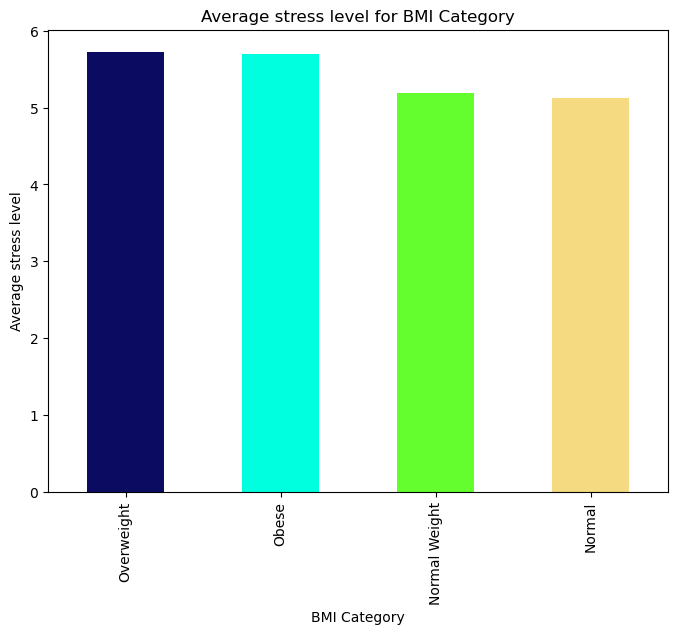

In [ ]:
data.groupby('BMI Category')['Stress Level'].mean().sort_values(ascending=False)\
.plot(kind='bar',title="Average stress level for BMI Category",figsize=(8,6),color=['#0B0B61','#00FFDF','#64FE2E','#F5DA81'])
plt.xlabel("BMI Category")
plt.ylabel("Average stress level")
plt.show()

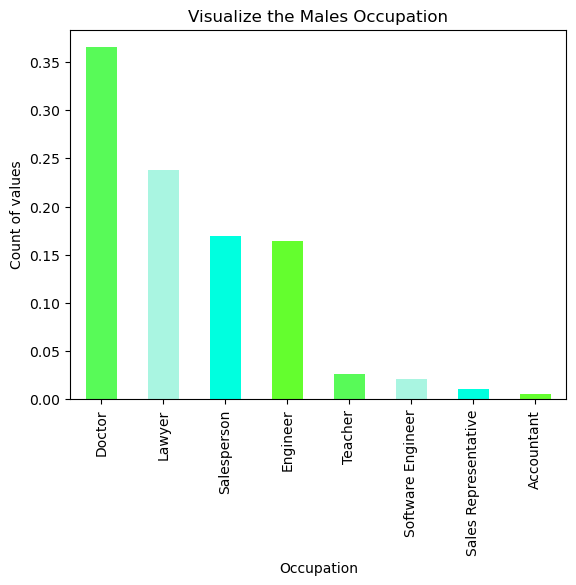

In [ ]:
data.loc[data['Gender']=='Male']['Occupation'].value_counts(normalize=True)\
.plot(kind='bar', title="Visualize the Males Occupation",color=['#58FA58','#A9F5E1','#00FFDF','#64FE2E'])
plt.xlabel('Occupation')
plt.ylabel("Count of values")
plt.show()

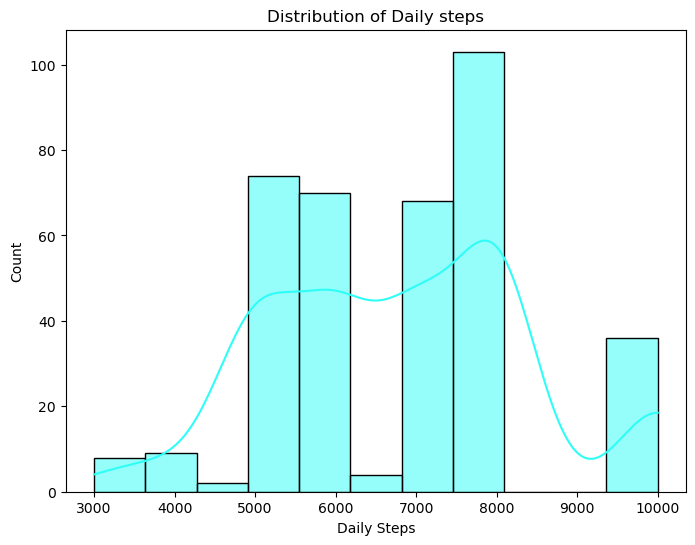

In [ ]:
plt.figure(figsize=(8,6))
sns.histplot(data['Daily Steps'],bins='auto',color=['#2EFEF7'],kde=True)
plt.title("Distribution of Daily steps")
plt.show()

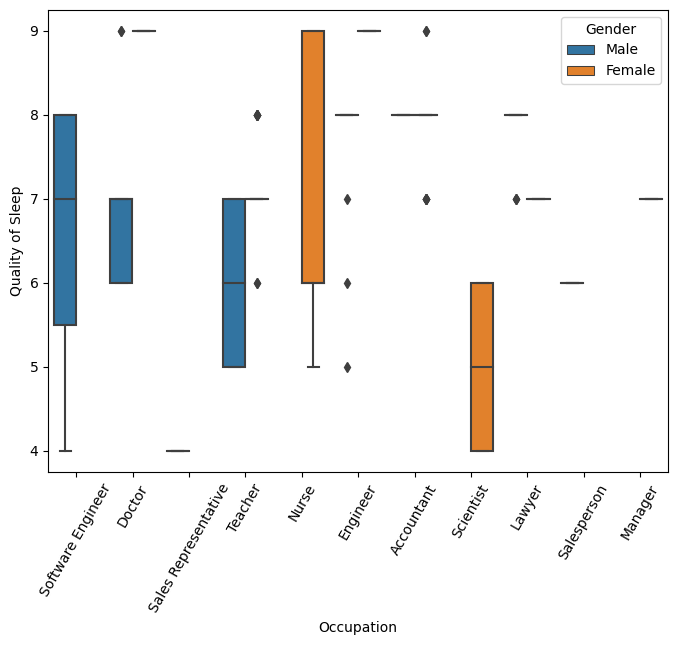

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(data=data,x='Occupation',y='Quality of Sleep',hue='Gender')
plt.xlabel("Occupation")
plt.ylabel("Quality of Sleep")
plt.xticks(rotation=60)
plt.show()

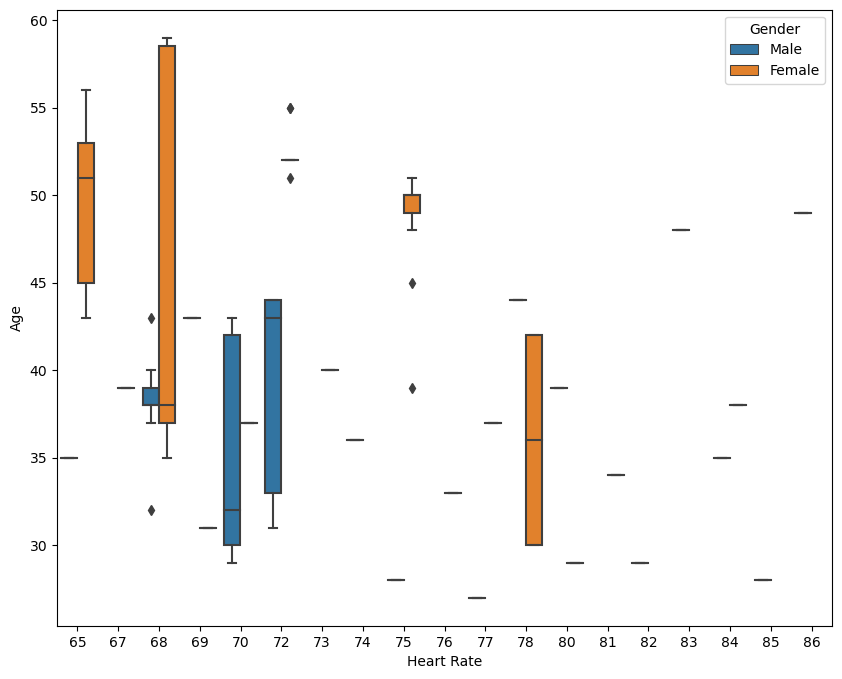

In [ ]:
plt.figure(figsize=(10,8))
sns.boxplot(data=data,x='Heart Rate',y='Age',hue='Gender')
plt.xlabel("Heart Rate")
plt.ylabel("Age")
plt.show()

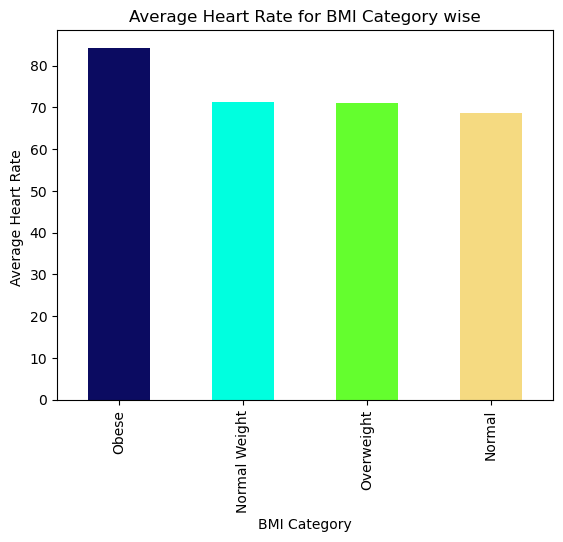

In [ ]:
data.groupby('BMI Category')['Heart Rate'].mean().sort_values(ascending=False)\
.plot(kind='bar',title="Average Heart Rate for BMI Category wise",color=['#0B0B61','#00FFDF','#64FE2E','#F5DA81'])
plt.xlabel("BMI Category")
plt.ylabel("Average Heart Rate ")
plt.show()

In [ ]:
data.groupby(['Occupation','BMI Category'])['Sleep Duration'].mean().sort_values(ascending=False)\
.unstack()\
.style.background_gradient(cmap='gist_heat_r')

BMI Category,Normal,Normal Weight,Obese,Overweight
Occupation,,,,
Accountant,7.161538,7.520000,nan,6.566667
Doctor,6.887692,8.200000,7.700000,nan
Engineer,8.080357,7.450000,nan,6.966667
Lawyer,7.438095,6.900000,7.400000,7.100000
Manager,nan,nan,nan,6.900000
Nurse,nan,6.900000,nan,7.080303
Sales Representative,nan,nan,5.900000,nan
Salesperson,nan,nan,nan,6.403125
Scientist,nan,nan,nan,6.000000


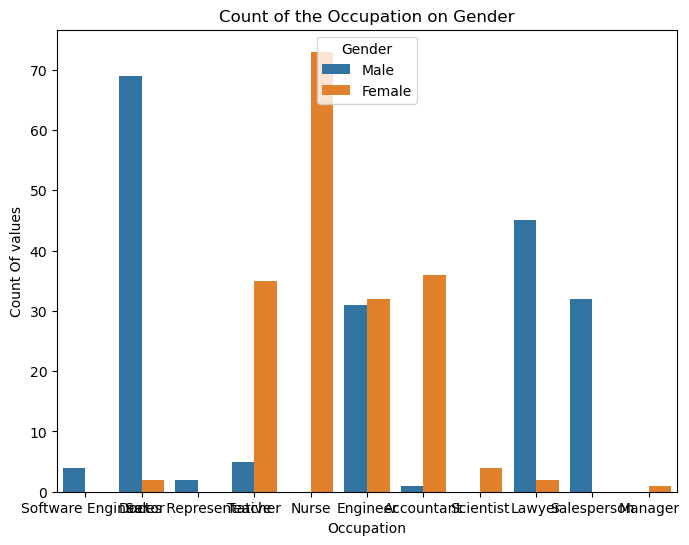

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(data=data,x='Occupation',hue='Gender')
plt.title("Count of the Occupation on Gender")
plt.xlabel("Occupation")
plt.ylabel("Count Of values")
plt.show()

In [ ]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


In [ ]:
import sys

In [ ]:
import xgboost

In [ ]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from sklearn.model_selection import train_test_split,GridSearchCV,ShuffleSplit
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
for col in data.select_dtypes(include='object'):
    label_encoder=LabelEncoder()
    label_encoder.fit(data[col].unique())
    data[col]=label_encoder.transform(data[col])

In [ ]:
X=data.drop(['Sleep Disorder'],axis=1)
y=data['Sleep Disorder']
scaler=MinMaxScaler()
scaler.fit(X)
X=scaler.fit_transform(X)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=200)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(261, 11)
(113, 11)
(261,)
(113,)


In [ ]:
algo={
    'logistic_regression':{
        'model': LogisticRegression(),
        'params':{
        }
    },
    'SVM':{
        'model':SVC(),
        'params':{
        }
    },
    'decision_tree':{
        'model': DecisionTreeClassifier(),
        'params':{
            'criterion':['gini','entropy','log_loss'],
            'splitter':['best','random']
        }
    },
    'random_forest':{
        'model': RandomForestClassifier(),
        'params':{
            'n_estimators':[1,5,10,20,50],
            'criterion':['gini','entropy','log_loss']
        }
    },
    'ada_boost_classifier': {
        'model': AdaBoostClassifier(),
        'params': {
           'n_estimators': [1,5,10,20,50,100]
        }
    },
    'gradient_boosting_classifier': {
        'model': GradientBoostingClassifier(),
        'params': {
           'n_estimators': [1,5,10, 20, 50, 100],
        }
    },
    'xbgclassifier':{
        'model': XGBClassifier(),
        'params': {
           'n_estimators': [1,5,10, 20, 50]
        }
    },
    'cat_boost_classifier':{
        'model':CatBoostClassifier(),
        'params': {
           'iterations':[1]
        }
    },
    'knn_classifier':{
        'model': KNeighborsClassifier(),
        'params': {
        }
    }
}


In [ ]:
score=[]

cv=ShuffleSplit (n_splits=5, test_size=0.2, random_state=10)
for algo_name, mp in algo.items():
    grid=GridSearchCV(mp['model'], mp['params'],cv=cv,return_train_score=False)
    grid.fit(X,y)
    score.append({
        'model': algo_name,
        'best score': grid.best_score_,
        'best_params':grid.best_params_
    })

Learning rate set to 0.5
0:	learn: 0.6587861	total: 132ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.6686615	total: 1.98ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.6705082	total: 1.19ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.6458583	total: 1.69ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.6547457	total: 1.23ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.6587434	total: 2.1ms	remaining: 0us


In [ ]:
score=pd.DataFrame(score, columns=['model', 'best_score', 'best_params'])
score.head()

,model,best_score,best_params
0,logistic_regression,NaN,{}
1,SVM,NaN,{}
2,decision_tree,NaN,"{'criterion': 'gini', 'splitter': 'random'}"
3,random_forest,NaN,"{'criterion': 'entropy', 'n_estimators': 50}"
4,ada_boost_classifier,NaN,{'n_estimators': 5}


In [ ]:

import sys

In [ ]:
!pip install imblearn --user

In [ ]:
!pip install imbalanced-learn

In [ ]:
import imblearn.combine

In [ ]:
from imblearn.combine import SMOTETomek

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

from imblearn.combine import SMOTETomek

def model_buliding(model, X_train, X_test, y_train, y_test):
    sm = SMOTETomek()
    X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

    model.fit(X_train_sm, y_train_sm)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred) * 100
    print(f'Accuracy score of the {model} is {accuracy:.2f}')
    print(classification_report(y_test, y_pred))

    confusion = confusion_matrix(y_test, y_pred)
    sns.heatmap(confusion, annot=True, cmap='gist_earth')
    plt.show()


In [ ]:
!pip install --upgrade catboost

In [ ]:
from catboost import CatBoostClassifier

In [ ]:
def model_building():
    # Your code here
    pass

model_building()  # Call the function


Learning rate set to 0.5
0:	learn: 0.6403034	total: 2.27ms	remaining: 0us
Accuracy score of the <catboost.core.CatBoostClassifier object at 0x00000119182285B0> is 85.84
              precision    recall  f1-score   support

           0       0.82      0.70      0.76        20
           1       0.91      0.93      0.92        69
           2       0.73      0.79      0.76        24

    accuracy                           0.86       113
   macro avg       0.82      0.81      0.81       113
weighted avg       0.86      0.86      0.86       113



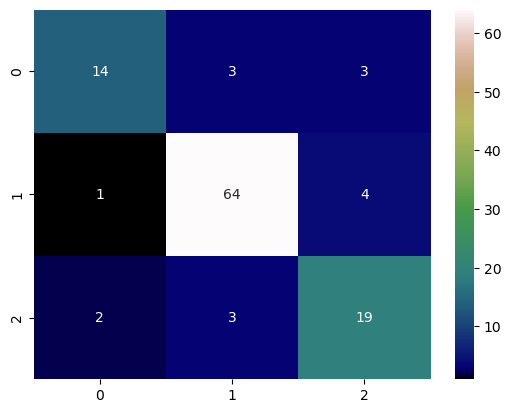

In [ ]:
logistic=CatBoostClassifier(iterations=1)
model_buliding(logistic,X_train,X_test,y_train,y_test)

In [ ]:
from xgboost import XGBClassifier

In [ ]:
from xgboost import XGBClassifier
xgb_classifier = XGBClassifier()



Accuracy score of the XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...) is 91.15
              precision    recall  f1-score   support

           0       0.89      0.80      0.84        20
           1       0.97      0.94      0.96        69
           2       0.79      0.92      0.85  

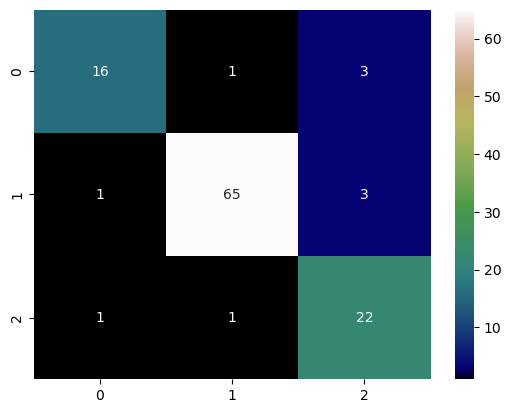

In [ ]:
xgb=XGBClassifier()
model_buliding(xgb,X_train,X_test,y_train,y_test)

In [ ]:
!pip install scikit-learn

In [ ]:
from sklearn.neighbors import KNeighborsClassifier


Accuracy score of the KNeighborsClassifier() is 87.61
              precision    recall  f1-score   support

           0       0.80      0.80      0.80        20
           1       0.97      0.90      0.93        69
           2       0.72      0.88      0.79        24

    accuracy                           0.88       113
   macro avg       0.83      0.86      0.84       113
weighted avg       0.89      0.88      0.88       113



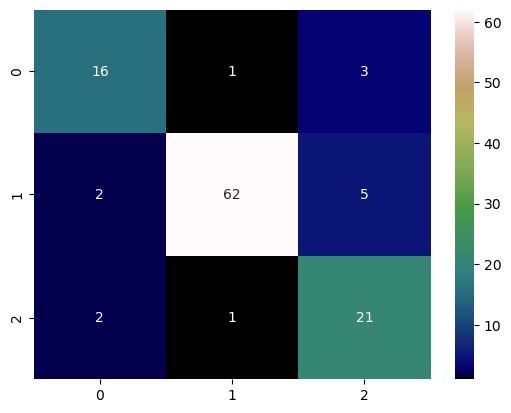

In [ ]:
knn=KNeighborsClassifier()
model_buliding (knn, X_train, X_test,y_train,y_test)

Accuracy score of the GradientBoostingClassifier() is 92.04
              precision    recall  f1-score   support

           0       0.89      0.85      0.87        20
           1       0.97      0.94      0.96        69
           2       0.81      0.92      0.86        24

    accuracy                           0.92       113
   macro avg       0.89      0.90      0.90       113
weighted avg       0.92      0.92      0.92       113



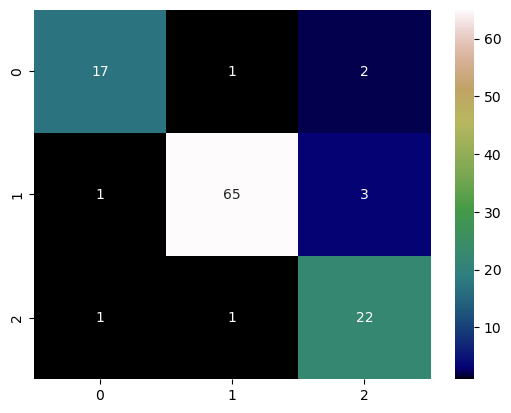

In [ ]:
grad=GradientBoostingClassifier()
model_buliding (grad, X_train, X_test, y_train, y_test)